<a href="https://colab.research.google.com/github/Tribodee/PYTHON_FOR_VISYALIZATION/blob/main/Project_unsupervise_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Wholesale customers Data Set
data = pd.read_csv("/content/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.shape

(440, 8)

Manipulate and Cleaning data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#CHANNEL Frequency
Horeca ex hotel, cafe

In [ ]:
ho = data.loc[data['Channel'] == 1]
ho.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,1,3,13265,1196,4221,6404,507,1788
8,1,3,5963,3648,6192,425,1716,750
15,1,3,10253,1114,3821,397,964,412
17,1,3,5876,6157,2933,839,370,4478
19,1,3,7780,2495,9464,669,2518,501


In [ ]:
ho.shape

(298, 8)

#CHANEL Frequency
Retail

In [ ]:
re = data.loc[data['Channel'] == 2]
re.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451


In [ ]:
re.shape

(142, 8)

#Data plot

2.51006711409396

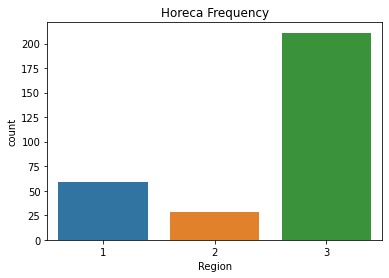

In [ ]:
plt.title("Horeca Frequency")
sns.countplot(data=ho, x="Region")
ho['Region'].mean()

2.612676056338028

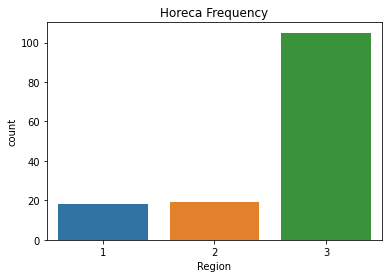

In [ ]:
plt.title("Horeca Frequency")
sns.countplot(data=re, x="Region")
re['Region'].mean()

#K-means

In [ ]:
from sklearn.cluster import KMeans

## Feature

In [ ]:
feature = list(data.columns)[:-2]
data_ = data[feature]

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

data_['clusters'] = kmeans.fit_predict(data_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,clusters
0,2,3,12669,9656,7561,214,2
1,2,3,7057,9810,9568,1762,2
2,2,3,6353,8808,7684,2405,2
3,1,3,13265,1196,4221,6404,2
4,2,3,22615,5410,7198,3915,1


In [ ]:
data_.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'clusters'], dtype='object')

In [ ]:
len(data_.columns)

7

Reduce data with PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
reduced_data = PCA().fit_transform(data_)

In [ ]:
results = pd.DataFrame(reduced_data,
                       columns=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'clusters'])

Kmeans Scatter Plot

In [ ]:
def plotKMean_cluster():
  plt.rcParams["figure.figsize"] = (8,6)
  sns.scatterplot(x="Channel", y="Region", 
                  hue=data_['clusters'], data=results, palette="bright")
  plt.title('K-means Clustering')
  plt.show()

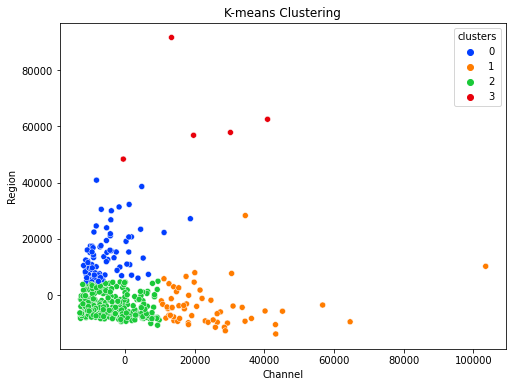

In [ ]:
plotKMean_cluster()

Agglomerative hierarchical clustering.


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
feature2 = list(data.columns)[:-2]
data2_ = data[feature2]

Reduce data with PCA

In [ ]:
reduced_data2 = PCA().fit_transform(data2_)

In [ ]:
results2 = pd.DataFrame(reduced_data2,
                       columns=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen'])

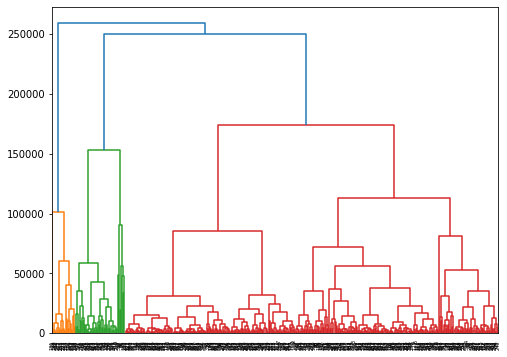

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(results2, method='ward'))

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [ ]:
results2['cluster_hc'] = hc.fit_predict(results2)

# HC Scatter Plot

In [ ]:
def plotHC_cluster():
  plt.rcParams["figure.figsize"] = (8,6)

  sns.scatterplot(x="Channel", y="Region", 
                  hue=results2['cluster_hc'], data=results2, palette="bright")
  plt.title('Agglomerative hierarchical clustering')
  plt.show()

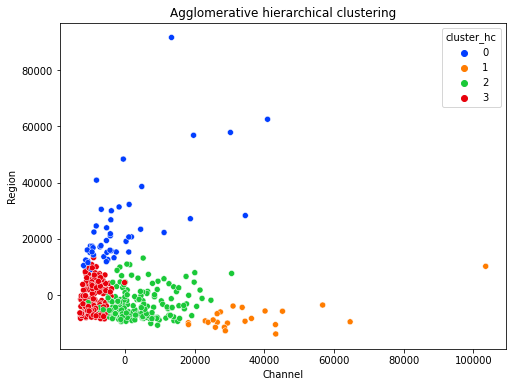

In [ ]:
plotHC_cluster()

# The Scatter plot between KMeans

Scatter Plot

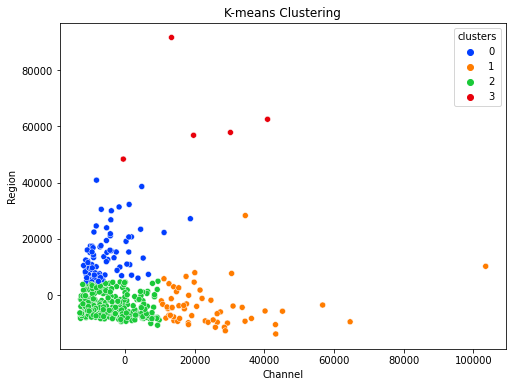

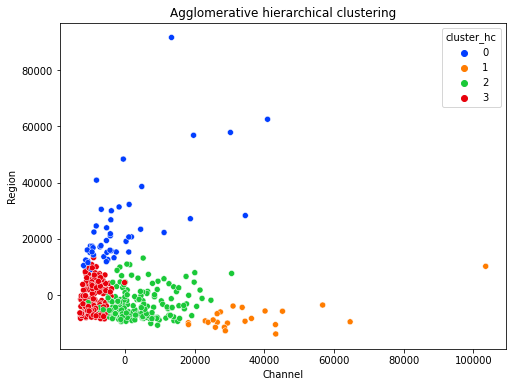

In [ ]:
plotKMean_cluster()
plotHC_cluster()